In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import pingouin as pg
import scipy.io as sio
import h5py
import wordcloud as wc

In [2]:
from matplotlib.font_manager import fontManager, FontProperties
fpath = "MYRIADPRO-REGULAR.OTF"
fontManager.addfont(fpath)
prop = FontProperties(fname=fpath)

# Predition results

## Cross prediction

In [5]:
cvdata = sio.loadmat('../crossprediction_validation.mat')
df_cvp = pd.DataFrame(cvdata['crossprediction_data_plot'])

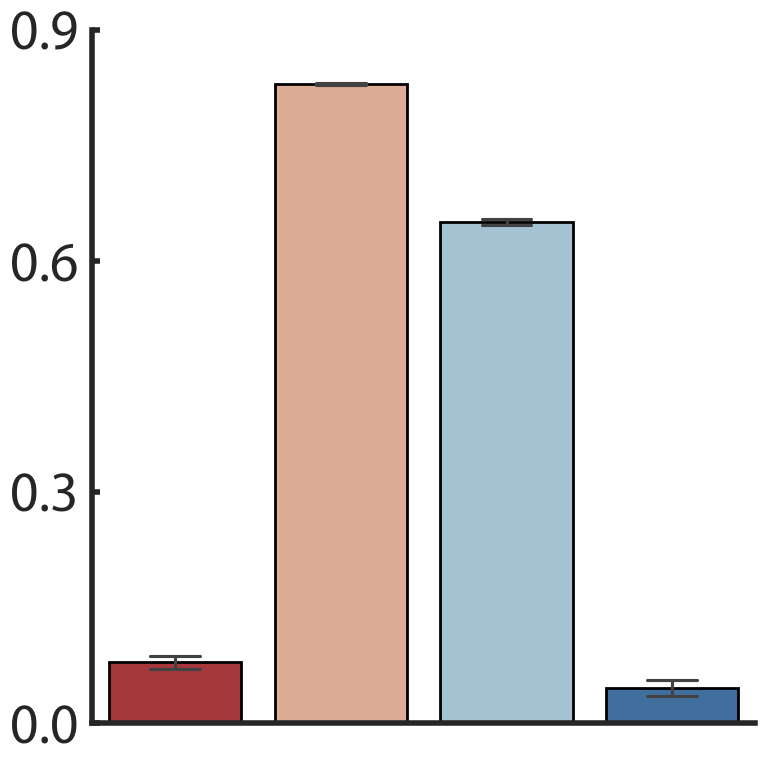

In [6]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,8)},font=prop.get_name())
barpalette = ["#b8262b", "#e9a888", "#9dc4db", "#316eac"]
fig, ax = plt.subplots(figsize=(9*0.95,9)) 
#sns.barplot(df_cvp,errorbar=("ci",95),capsize=.3,err_kws={"color": "0", "linewidth": 2}, palette=barpalette)
sns.barplot(df_cvp,errorbar="se",capsize=.3, palette=barpalette)
#g.set_axis_labels("", "Correlation (r)")
for bar in ax.patches:
    bar.set_linewidth(2)
    bar.set_edgecolor('black')

ax.set(xlabel='', ylabel='')
ax.set(xticks=[])
ax.set(ylim=(0, 0.9), yticks=[0,0.3,0.6,0.9])
ax.tick_params(axis="y",direction="in", pad=10, width=4, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
sns.despine()

## Generalization plot

In [7]:
csf = h5py.File('../CosineSimilarityHCP.mat')
generalvalence_data = pd.DataFrame({'Semantic':csf['similarity_generalvalence_map_G1'][0],
                                    'Value':csf['similarity_generalvalence_map_G2'][0]})
placevsface_data = pd.DataFrame({'Semantic':csf['similarity_placevsface_map_G1'][0],
                                    'Value':csf['similarity_placevsface_map_G2'][0]})

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_12285/1918551995.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(generalvalence_data,size=10,palette=["grey"],alpha=0.5)


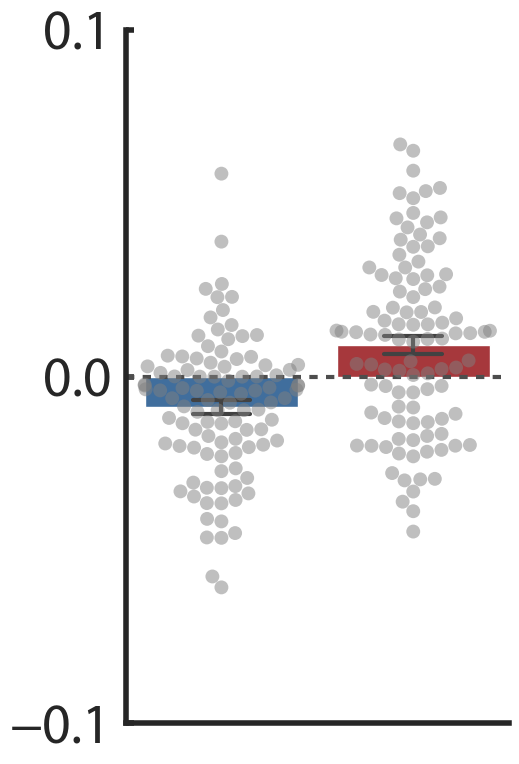

In [79]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,8)},font=prop.get_name())
fig, ax = plt.subplots(figsize=(9*0.55,9)) 
sns.barplot(generalvalence_data,errorbar="se",capsize=.3,errwidth=3, palette=["#316eac", "#b8262b"])
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
sns.swarmplot(generalvalence_data,size=10,palette=["grey"],alpha=0.5)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-0.1,0.1), yticks=[-0.1,0,0.1])
ax.set(xticks=[])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_12285/1896357583.py:5: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(placevsface_data, size=10,palette=["grey"],alpha=0.5)


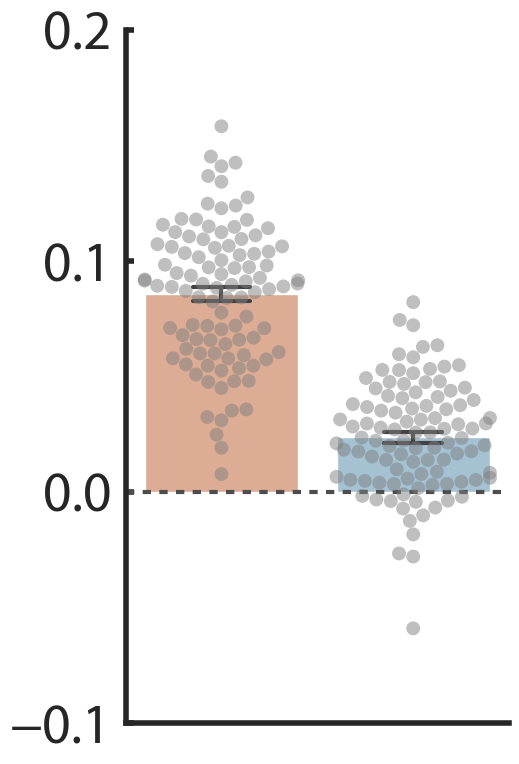

In [80]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,8)},font=prop.get_name())
fig, ax = plt.subplots(figsize=(9*0.55,9)) 
sns.barplot(placevsface_data,errorbar="se",capsize=.3,errwidth=3, palette=["#e9a888", "#9dc4db"])
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
sns.swarmplot(placevsface_data, size=10,palette=["grey"],alpha=0.5)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-0.1,0.2), yticks=[-0.1,0,0.1,0.2])
ax.set(xticks=[])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

## Model performance

In [9]:
# load performance data of prediction models
PPdata_G1 = sio.loadmat('../ART_G1_PrePerfomance.mat')
PPdata_G2 = sio.loadmat('../ART_G2_PrePerfomance.mat')
# load predicted timeseries data
TSPredata = sio.loadmat('../PreTS_lvls.mat')

In [23]:
# build dataframe for overall performance
df_PPG1 = pd.DataFrame({'SubID':np.tile(range(1,35),4),
                        'Truelvls':np.repeat([1,2,3,4],34).reshape((-1,1))[:,0],
                        'Predictlvls':PPdata_G1['predicted_ratings_reshaped'].reshape((-1,1), order='F')[:,0]})
df_PPG2 = pd.DataFrame({'SubID':np.tile(range(1,35),4),
                        'Truelvls':np.repeat([1,2,3,4],34).reshape((-1,1))[:,0],
                        'Predictlvls':PPdata_G2['predicted_ratings_reshaped'].reshape((-1,1), order='F')[:,0]})

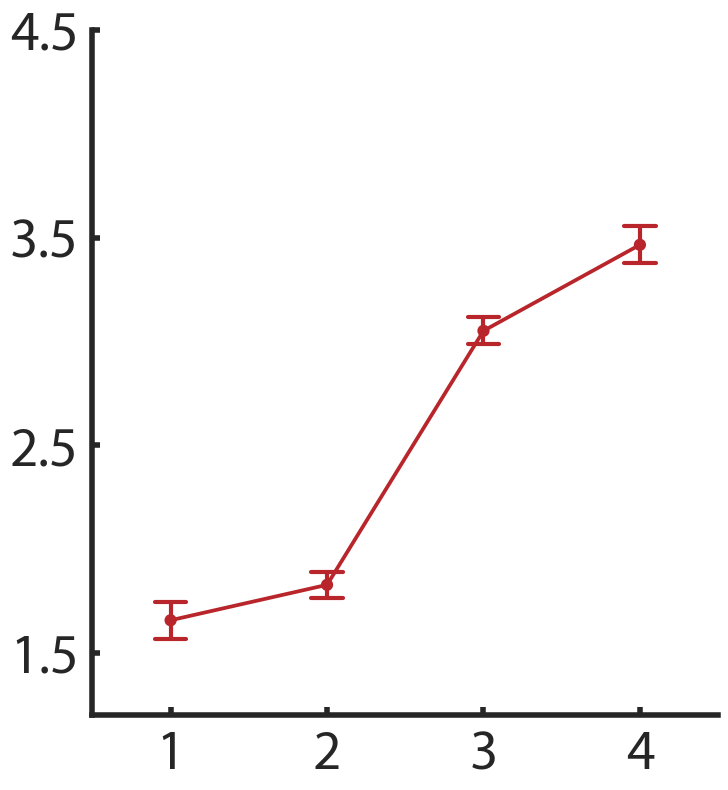

In [60]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(8,6)},font=prop.get_name())
ax = sns.catplot(data=df_PPG1,x="Truelvls",y="Predictlvls",color ="#b8262b",kind='point', capsize=.2,errwidth=3, markers="o", linestyles="-", errorbar="se",height=9,aspect=0.95)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(1.2,4), yticks=[1.5,2.5,3.5,4.5])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
for axs in ax.axes.flat:
    axs.spines["left"].set_linewidth(4)  # Left axis
    axs.spines["bottom"].set_linewidth(4) # Bottom axis
ax.tick_params(width=4)
sns.despine()


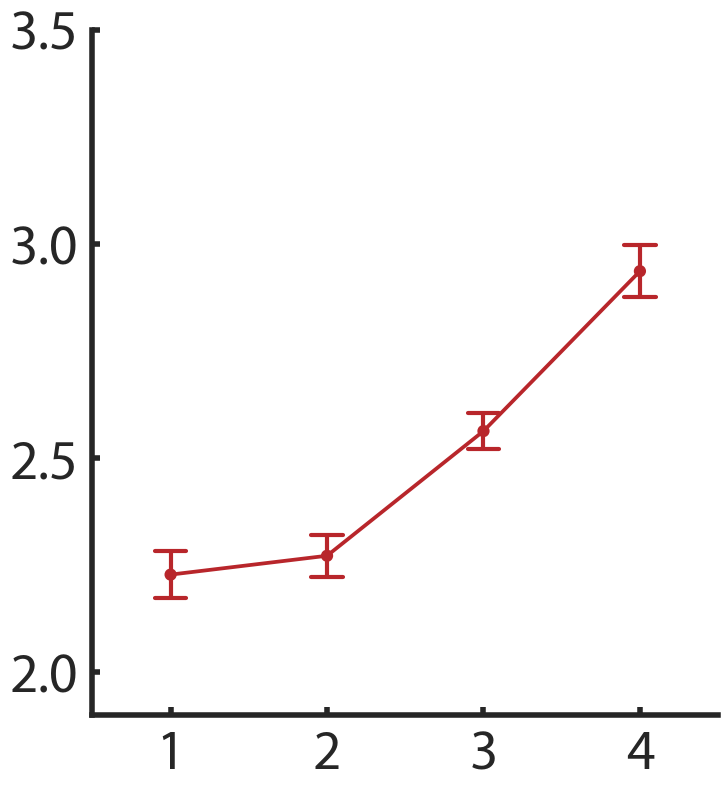

In [57]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(8,6)},font=prop.get_name())
ax = sns.catplot(data=df_PPG2,x="Truelvls",y="Predictlvls",color ="#b8262b",kind='point', capsize=.2,errwidth=3, markers="o", linestyles="-", errorbar="se",height=9,aspect=0.95)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(1.9,3.5), yticks=[2,2.5,3,3.5])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
for axs in ax.axes.flat:
    axs.spines["left"].set_linewidth(4)  # Left axis
    axs.spines["bottom"].set_linewidth(4) # Bottom axis
ax.tick_params(width=4)
sns.despine()

In [70]:
from matplotlib.colors import LinearSegmentedColormap
def truncate_colormap(cmap, min_val=0.0, max_val=1.0, n=100):
    """Truncate a colormap to use only a portion of its range."""
    new_cmap = LinearSegmentedColormap.from_list(
        "truncated", cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap

In [71]:
slopes = {}
for group in df_PPG1['SubID'].unique():
    group_data = df_PPG1[df_PPG1['SubID'] == group]
    slope = np.corrcoef(group_data['Truelvls'], group_data['Predictlvls']) # correlation
    slopes[group] = slope[0,1]
norm = plt.Normalize(vmin=-1, vmax=1)
cmap = plt.cm.coolwarm  # Choose a colormap
colors_g1 = {group: cmap(norm(slope)) for group, slope in slopes.items()}

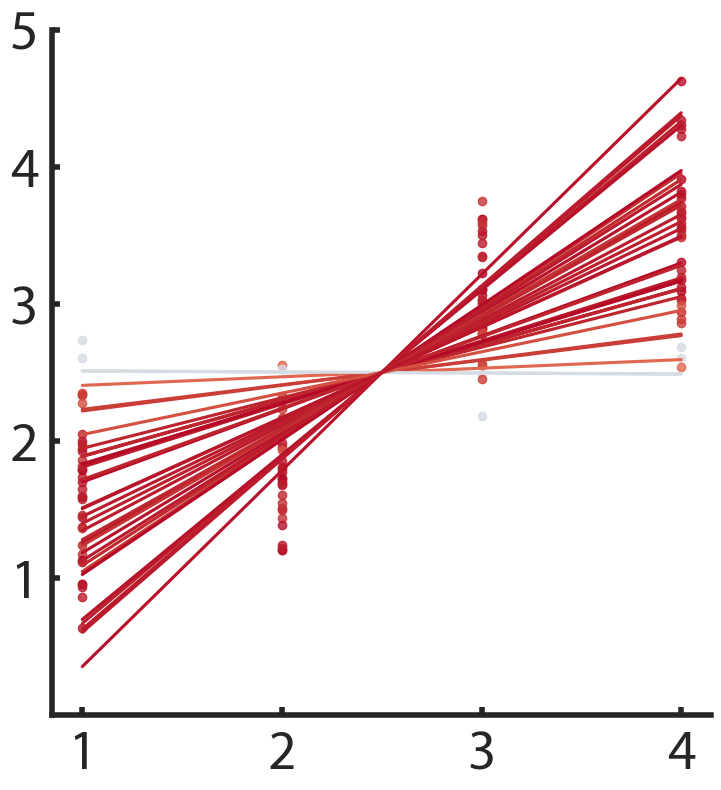

In [157]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(8,6)},font=prop.get_name())
ax = sns.lmplot(data=df_PPG1, x="Truelvls", y="Predictlvls", hue="SubID",legend=False,palette=colors_g1,ci=None,height=9,aspect=0.95)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(0,5), yticks=[1,2,3,4,5])
ax.set(xticks=[1,2,3,4])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
for axs in ax.axes.flat:
    axs.spines["left"].set_linewidth(4)  # Left axis
    axs.spines["bottom"].set_linewidth(4) # Bottom axis
ax.tick_params(width=4)
sns.despine()

In [78]:
from scipy.stats import linregress
slopes = {}
for group in df_PPG2['SubID'].unique():
    group_data = df_PPG2[df_PPG2['SubID'] == group]
    slope, _, _, _, _ = linregress(group_data['Truelvls'], group_data['Predictlvls'])  # Linear regression
    slopes[group] = slope
norm = plt.Normalize(vmin=-1, vmax=1)
cmap = plt.cm.coolwarm  # Choose a colormap
colors_g2 = {group: cmap(norm(slope)) for group, slope in slopes.items()}

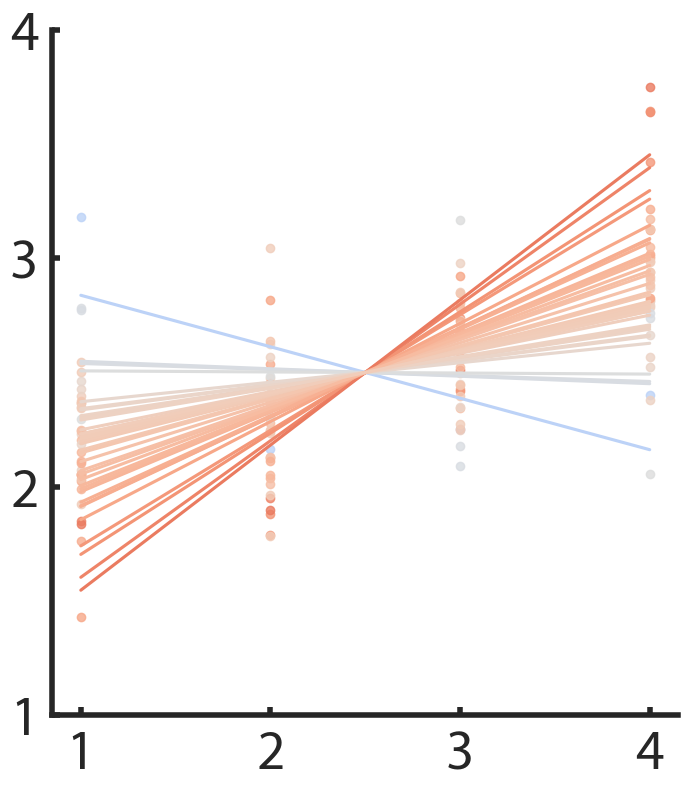

In [156]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(8,6)},font=prop.get_name())
ax = sns.lmplot(data=df_PPG2, x="Truelvls", y="Predictlvls", hue="SubID",legend=False,palette=colors_g2,ci=None,height=9,aspect=0.95)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(1,4), yticks=[1,2,3,4])
ax.set(xticks=[1,2,3,4])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
for axs in ax.axes.flat:
    axs.spines["left"].set_linewidth(4)  # Left axis
    axs.spines["bottom"].set_linewidth(4) # Bottom axis
ax.tick_params(width=4)
sns.despine()

In [44]:
df_TSpre_g1 = pd.DataFrame({'TSlvls':np.repeat(range(1,16),34).reshape((-1,1))[:,0],
                        'TSlvl1':TSPredata['PreTS_lvls_g1'][0][0].reshape((-1,1), order='F')[:,0],
                        'TSlvl2':TSPredata['PreTS_lvls_g1'][0][1].reshape((-1,1), order='F')[:,0],
                        'TSlvl3':TSPredata['PreTS_lvls_g1'][0][2].reshape((-1,1), order='F')[:,0],
                        'TSlvl4':TSPredata['PreTS_lvls_g1'][0][3].reshape((-1,1), order='F')[:,0],})
df_TSpre_g2 = pd.DataFrame({'TSlvls':np.repeat(range(1,16),34).reshape((-1,1))[:,0],
                        'TSlvl1':TSPredata['PreTS_lvls_g2'][0][0].reshape((-1,1), order='F')[:,0],
                        'TSlvl2':TSPredata['PreTS_lvls_g2'][0][1].reshape((-1,1), order='F')[:,0],
                        'TSlvl3':TSPredata['PreTS_lvls_g2'][0][2].reshape((-1,1), order='F')[:,0],
                        'TSlvl4':TSPredata['PreTS_lvls_g2'][0][3].reshape((-1,1), order='F')[:,0],})

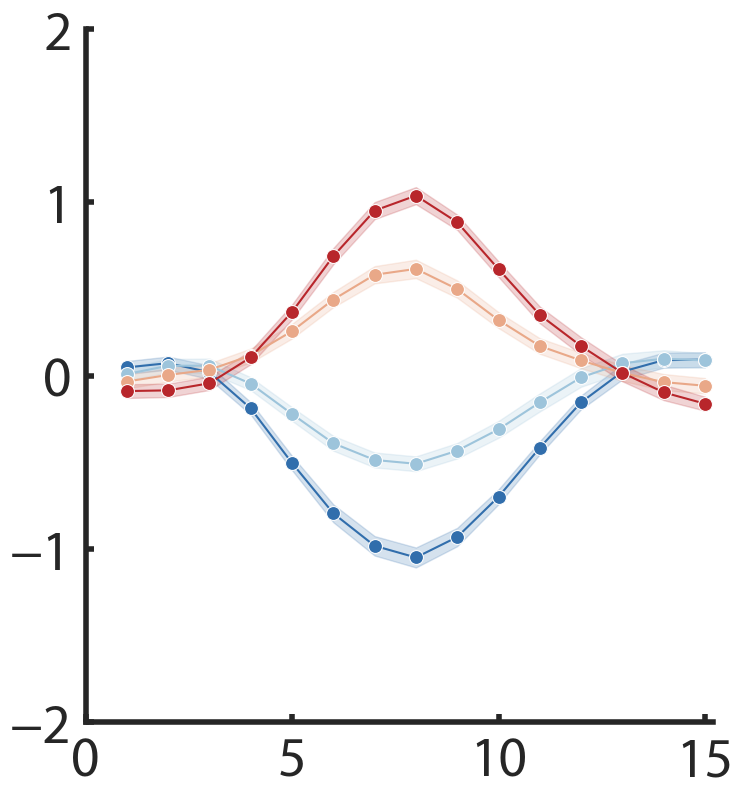

In [46]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(7,8)},font=prop.get_name())
fig, ax = plt.subplots(figsize=(9*0.9,9))  
sns.lineplot(x="TSlvls", y="TSlvl1", data=df_TSpre_g1,marker="o",markersize=10,errorbar='se',color="#316eac")
sns.lineplot(x="TSlvls", y="TSlvl2", data=df_TSpre_g1,marker="o",markersize=10,errorbar='se',color="#9dc4db")
sns.lineplot(x="TSlvls", y="TSlvl3", data=df_TSpre_g1,marker="o",markersize=10,errorbar='se',color="#e9a888")
sns.lineplot(x="TSlvls", y="TSlvl4", data=df_TSpre_g1,marker="o",markersize=10,errorbar='se',color="#b8262b")
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-2,2), yticks=[-2,-1,0,1,2])
ax.set(xlim=(0,15.2), xticks=[0,5,10,15])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

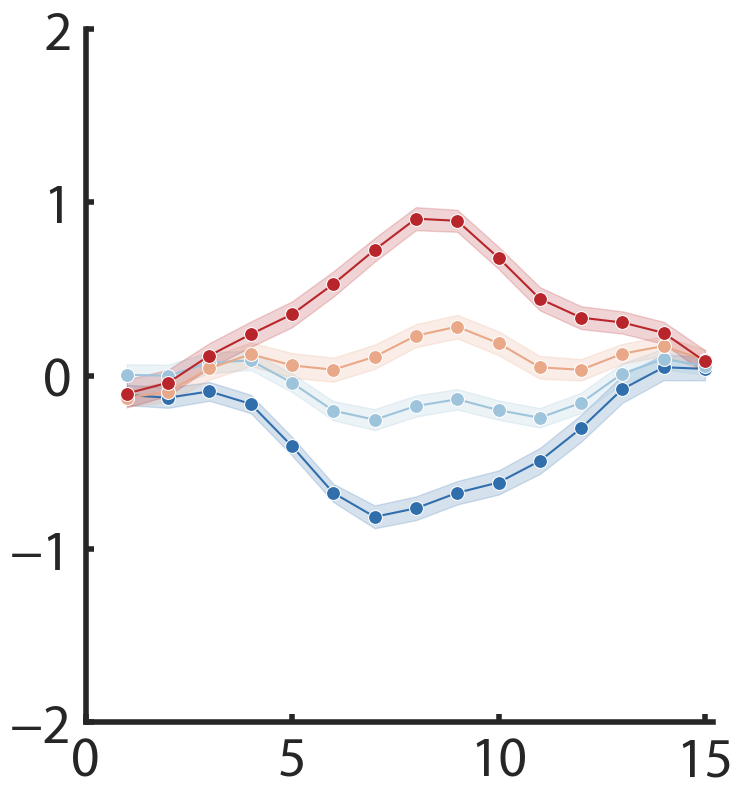

In [47]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(7,8)},font=prop.get_name())
fig, ax = plt.subplots(figsize=(9*0.9,9))  
sns.lineplot(x="TSlvls", y="TSlvl1", data=df_TSpre_g2,marker="o",markersize=10,errorbar='se',color="#316eac")
sns.lineplot(x="TSlvls", y="TSlvl2", data=df_TSpre_g2,marker="o",markersize=10, errorbar='se',color="#9dc4db")
sns.lineplot(x="TSlvls", y="TSlvl3", data=df_TSpre_g2,marker="o",markersize=10,errorbar='se',color="#e9a888")
sns.lineplot(x="TSlvls", y="TSlvl4", data=df_TSpre_g2,marker="o",markersize=10,errorbar='se',color="#b8262b")
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-2,2), yticks=[-2,-1,0,1,2])
ax.set(xlim=(0,15.2), xticks=[0,5,10,15])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

# RSA results 

In [10]:
AEQdata = pd.read_csv('../AEQ_scores.csv')

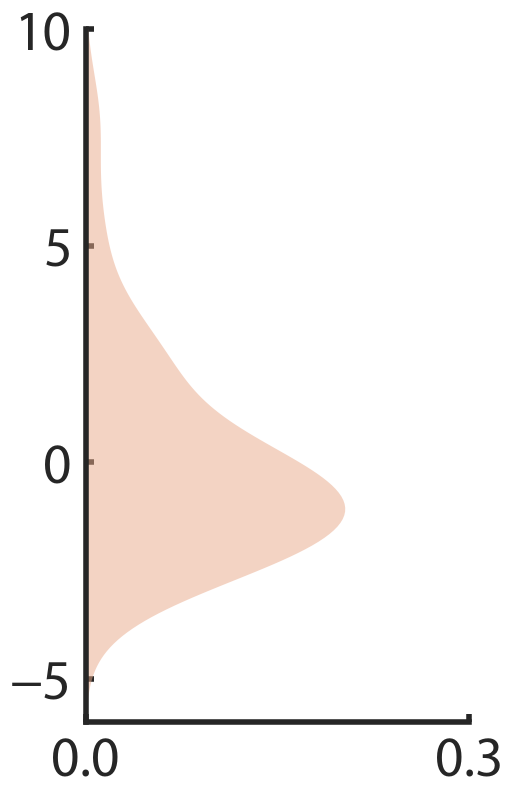

In [205]:
sns.set(font_scale=3,style="ticks",rc={'figure.figsize':(6,8)},font=prop.get_name())
fig, ax = plt.subplots(figsize=(9*0.55,9)) 
sns.kdeplot(data=AEQdata, y="AEQ_PC1", fill=True, common_norm=False, color="#e9a888", alpha=.5, linewidth=0)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-6,10), yticks=[-5,0,5,10])
ax.set(xlim=(0,0.2), xticks=[0,0.3])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

In [11]:
df_rsa_aeq = pd.read_csv('../RSA_AEQ_3peaks_value.csv',header=None)
df_rsa_aeq.rename(columns = {0:'1x',1:'2x',2:'3x',3:'1y',4:'2y',5:'3y'}, inplace = True) 

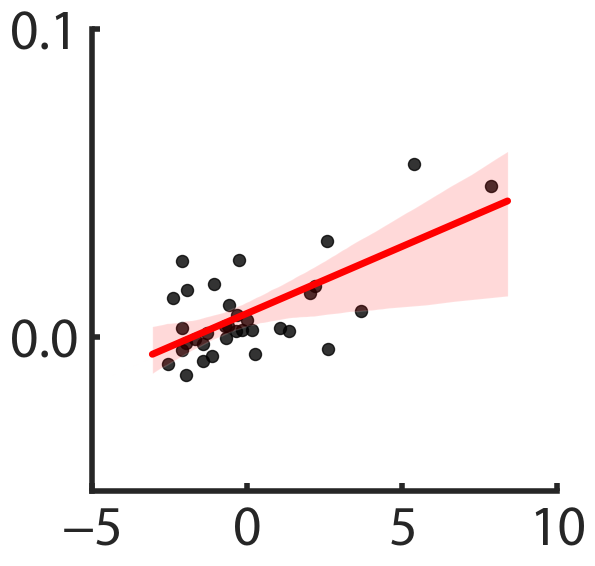

In [5]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",font=prop.get_name())
fig, ax = plt.subplots(figsize=(6,6))  
sns.regplot(data=df_rsa_aeq,x='1x',y='1y',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-5, 10), xticks=[-5,0,5,10])
ax.set(ylim=(-0.05, 0.1), yticks=[0,0.1])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

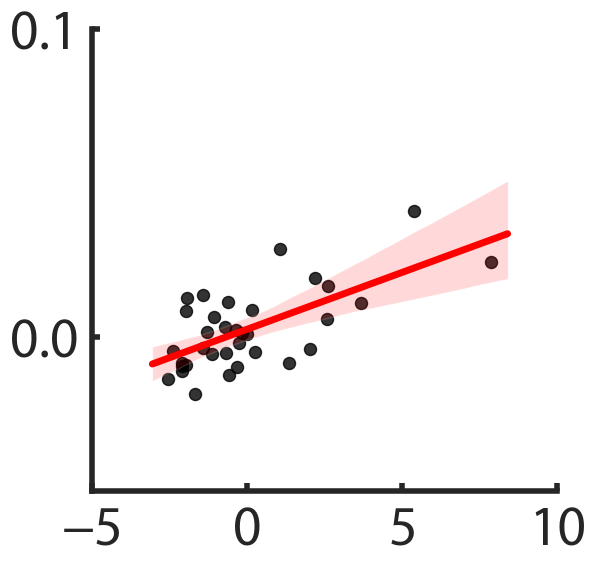

In [6]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",font=prop.get_name())
fig, ax = plt.subplots(figsize=(6,6))  
sns.regplot(data=df_rsa_aeq,x='2x',y='2y',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-5, 10), xticks=[-5,0,5,10])
ax.set(ylim=(-0.05, 0.1), yticks=[0,0.1])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

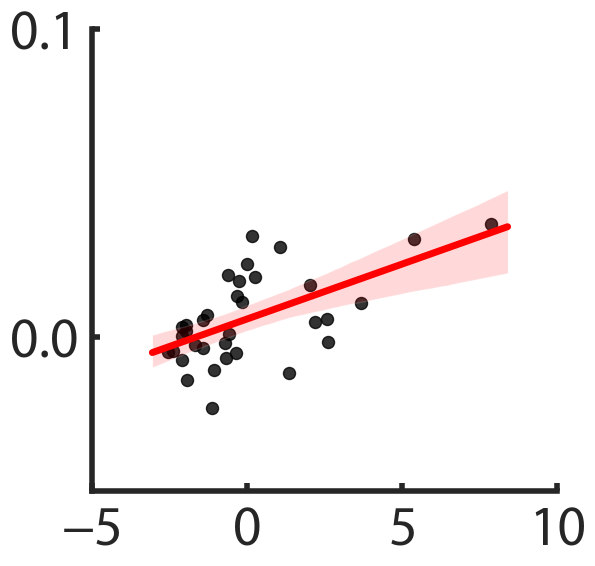

In [7]:
sns.set_context("talk")
sns.set(font_scale=3,style="ticks",font=prop.get_name())
fig, ax = plt.subplots(figsize=(6,6))  
sns.regplot(data=df_rsa_aeq,x='3x',y='3y',color="black",marker='.',scatter_kws={'s':300}, line_kws={"color": "red","linewidth":5},ci = 95,truncate = False)
ax.set(xlabel='', ylabel='')
ax.set(xlim=(-5, 10), xticks=[-5,0,5,10])
ax.set(ylim=(-0.05, 0.1), yticks=[0,0.1])
ax.tick_params(axis="y",direction="in", pad=10, labelsize=40)
ax.tick_params(axis="x",direction="in", pad=10, labelsize=40)
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.tick_params(width=4)
sns.despine()

# Functional decoding

## NeuroSynth topics

In [12]:
topics=pd.read_csv('../TopicTerms4plot.csv')
weights1 = {topics['Topics1'][i][1:-1]: topics['r1'][i] for i in range(len(topics['Topics1']))}
weights2 = {topics['Topics2'][i][1:-1]: topics['r2'][i] for i in range(len(topics['Topics1']))}
weights3 = {topics['Topics3'][i][1:-1]: topics['r3'][i] for i in range(len(topics['Topics1']))}
weights4 = {topics['Topics4'][i][1:-1]: topics['r4'][i] for i in range(len(topics['Topics1']))}

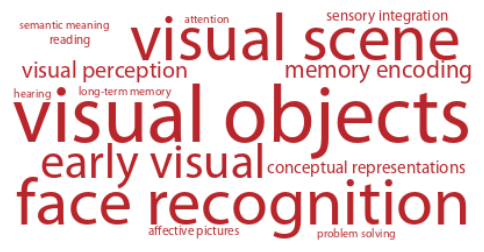

In [15]:
wc_plot = wc.WordCloud(background_color="white", font_path=fpath, random_state=9,prefer_horizontal=1,relative_scaling=1,max_font_size=70,min_font_size=10)
wc_plot.generate_from_frequencies(weights1)
# show
plt.imshow(wc_plot.recolor(color_func=lambda **kwargs: "#b8262b"),interpolation="bilinear")
plt.axis("off")
plt.show()

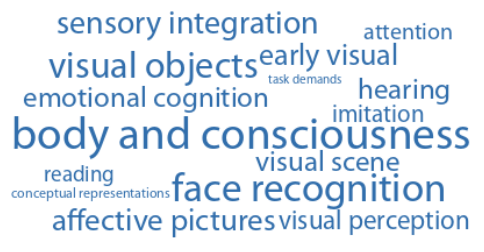

In [16]:
wc_plot = wc.WordCloud(background_color="white", font_path=fpath, random_state=5,prefer_horizontal=1,relative_scaling=1,max_font_size=70,min_font_size=10)
wc_plot.generate_from_frequencies(weights2)
# show
plt.imshow(wc_plot.recolor(color_func=lambda **kwargs: "#316eac"),interpolation="bilinear")
plt.axis("off")
plt.show()

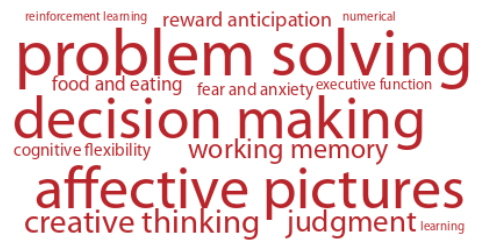

In [17]:
wc_plot = wc.WordCloud(background_color="white", font_path=fpath, random_state=1,prefer_horizontal=1,relative_scaling=1,max_font_size=70,min_font_size=10)
wc_plot.generate_from_frequencies(weights3)
# show
plt.imshow(wc_plot.recolor(color_func=lambda **kwargs: "#b8262b"),interpolation="bilinear")
plt.axis("off")
plt.show()

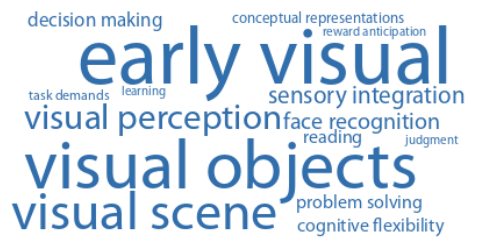

In [18]:
wc_plot = wc.WordCloud(background_color="white", font_path=fpath, random_state=1,prefer_horizontal=1,relative_scaling=1,max_font_size=70,min_font_size=10)
wc_plot.generate_from_frequencies(weights4)
# show
plt.imshow(wc_plot.recolor(color_func=lambda **kwargs: "#316eac"),interpolation="bilinear")
plt.axis("off")
plt.show()

## Functional localizer task

In [13]:
FLT_act_ind_all = scipy.io.matlab.loadmat(
    '../FLT_indcop_signature_allsig.mat')
df_dim1_pos = pd.DataFrame(
    {'Value': np.concatenate([FLT_act_ind_all['PC1_pos_indavgs'][:, 0], FLT_act_ind_all['PC1_pos_indavgs'][:, 1],
                              FLT_act_ind_all['PC1_pos_indavgs'][:, 2], FLT_act_ind_all['PC1_pos_indavgs'][:, 3]]),
     'Category': np.repeat(['Face', 'Body', 'Obejct', 'Place'], 34),
     'Subject': np.tile(np.arange(1, 35), 4).astype(str)})
df_dim1_neg = pd.DataFrame(
    {'Value': np.concatenate([FLT_act_ind_all['PC1_neg_indavgs'][:, 0], FLT_act_ind_all['PC1_neg_indavgs'][:, 1]
                                 , FLT_act_ind_all['PC1_neg_indavgs'][:, 2], FLT_act_ind_all['PC1_neg_indavgs'][:, 3]]),
     'Category': np.repeat(['Face', 'Body', 'Obejct', 'Place'], 34),
     'Subject': np.tile(np.arange(1, 35), 4).astype(str)})
df_dim2_pos = pd.DataFrame({'Value':np.concatenate([FLT_act_ind_all['PC2_pos_indavgs'][:,0],FLT_act_ind_all['PC2_pos_indavgs'][:,1], 
                                                FLT_act_ind_all['PC2_pos_indavgs'][:,2],FLT_act_ind_all['PC2_pos_indavgs'][:,3]]),
                        'Category':np.repeat(['Face','Body','Obejct','Place'],34),
                        'Subject':np.tile(np.arange(1,35),4).astype(str)})
df_dim2_neg = pd.DataFrame({'Value':np.concatenate([FLT_act_ind_all['PC2_neg_indavgs'][:,0],FLT_act_ind_all['PC2_neg_indavgs'][:,1]
                                                       ,FLT_act_ind_all['PC2_neg_indavgs'][:,2], FLT_act_ind_all['PC2_neg_indavgs'][:,3]]),
                        'Category':np.repeat(['Face','Body','Obejct','Place'],34),
                        'Subject':np.tile(np.arange(1,35),4).astype(str)})

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/877845686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Category", y="Value", data=df_dim1_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)
/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/877845686.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x="Category", y="Value", data=df_dim1_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)


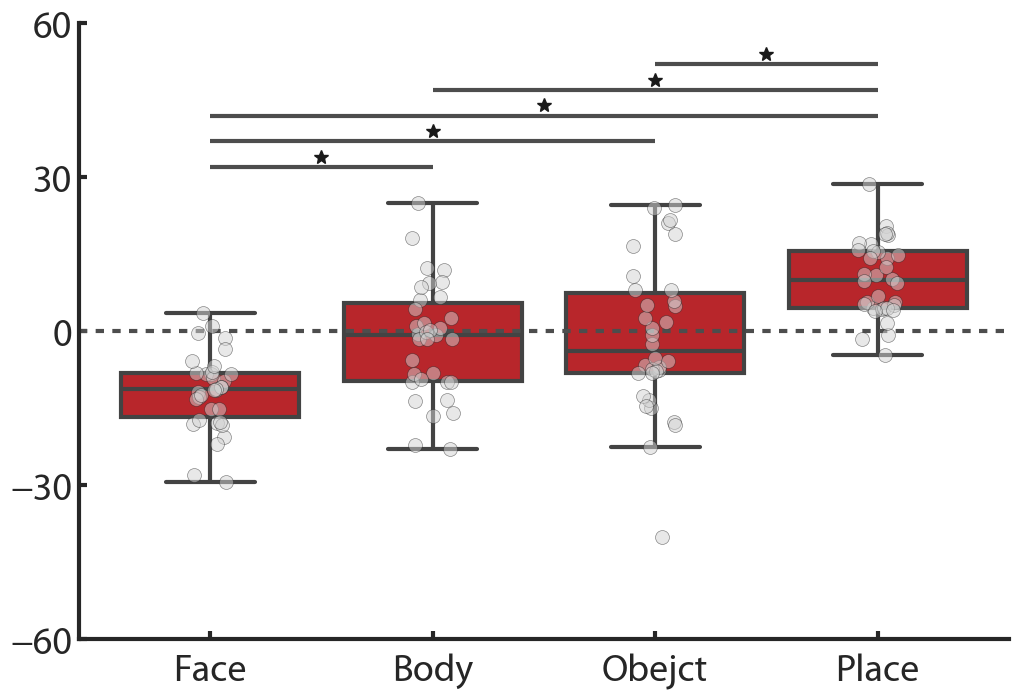

In [20]:
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(12,8)},font=prop.get_name())
ax = sns.boxplot(x="Category", y="Value", data=df_dim1_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
#ax.plot('Face', 58, '*', color = 'k',markersize=15)
#ax.plot('Place', 58, '*', color = 'k',markersize=15)
sns.stripplot(df_dim1_pos, x="Category", y="Value", size=10,color='lightgrey',edgecolor='k',linewidth=0.5,alpha=0.5)

ax.hlines(32, 0, 1, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(37, 0, 2, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(42, 0, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(47, 1, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(52, 2, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.plot(0.5, 34, '*', color = 'k',markersize=10)
ax.plot(1, 39, '*', color = 'k',markersize=10)
ax.plot(1.5, 44, '*', color = 'k',markersize=10)
ax.plot(2, 49, '*', color = 'k',markersize=10)
ax.plot(2.5, 54, '*', color = 'k',markersize=10)

ax.set(xlabel='', ylabel='')
ax.set(ylim=(-60,60), yticks=[-60,-30,0,30,60])
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=10)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(width=3)
sns.despine()

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/1908740757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Category", y="Value", data=df_dim1_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)
/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/1908740757.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x="Category", y="Value", data=df_dim1_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)


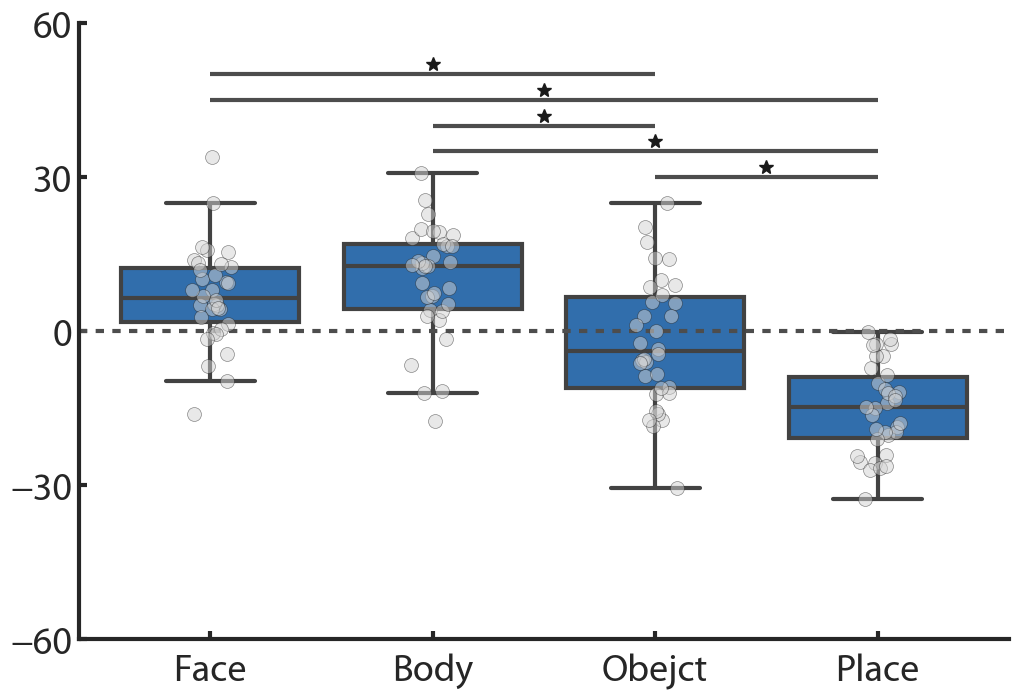

In [21]:
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(12,8)},font=prop.get_name())
ax = sns.boxplot(x="Category", y="Value", data=df_dim1_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
sns.stripplot(df_dim1_neg, x="Category", y="Value", size=10,color='lightgrey',edgecolor='k',linewidth=0.5,alpha=0.5)

ax.hlines(50, 0, 2, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(45, 0, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(40, 1, 2, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(35, 1, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(30, 2, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.plot(1, 52, '*', color = 'k',markersize=10)
ax.plot(1.5, 47, '*', color = 'k',markersize=10)
ax.plot(1.5, 42, '*', color = 'k',markersize=10)
ax.plot(2, 37, '*', color = 'k',markersize=10)
ax.plot(2.5, 32, '*', color = 'k',markersize=10)

ax.set(xlabel='', ylabel='')
ax.set(ylim=(-60,60), yticks=[-60,-30,0,30,60])
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=10)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(width=3)
sns.despine()

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/2805754323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Category", y="Value", data=df_dim2_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)
/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/2805754323.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x="Category", y="Value", data=df_dim2_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)


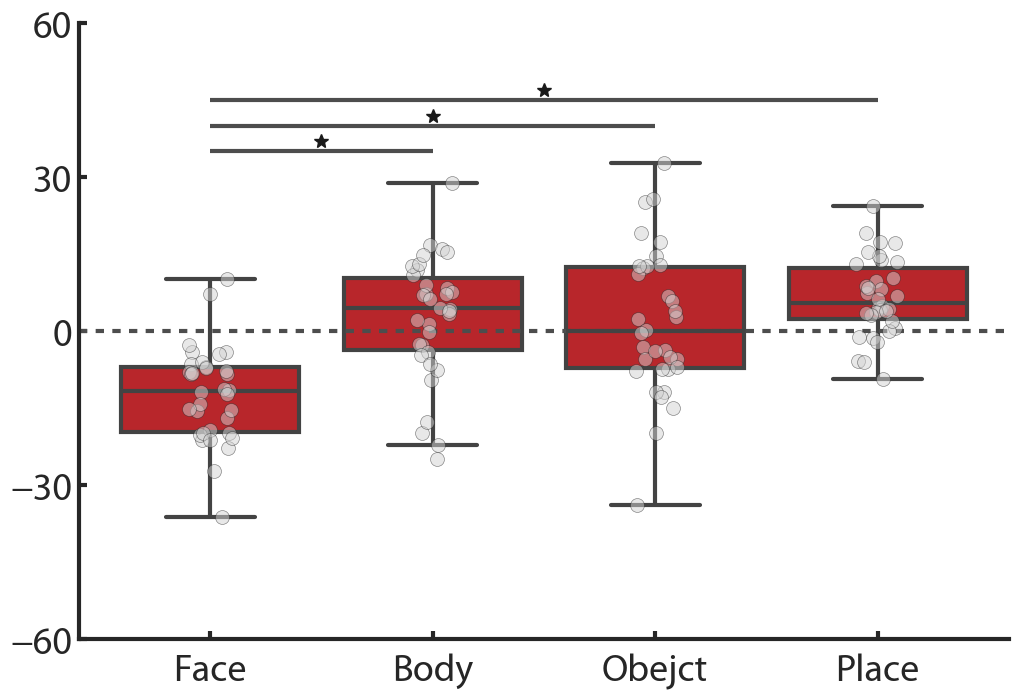

In [22]:
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(12,8)},font=prop.get_name())
ax = sns.boxplot(x="Category", y="Value", data=df_dim2_pos,palette=["#b8262b"],fliersize=0,saturation=1,linewidth=3)
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
sns.stripplot(df_dim2_pos, x="Category", y="Value", size=10,color='lightgrey',edgecolor='k',linewidth=0.5,alpha=0.5)

ax.hlines(35, 0, 1, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(40, 0, 2, colors=".3", linestyles='solid',linewidth=3,label='')
ax.hlines(45, 0, 3, colors=".3", linestyles='solid',linewidth=3,label='')
ax.plot(0.5, 37, '*', color = 'k',markersize=10)
ax.plot(1, 42, '*', color = 'k',markersize=10)
ax.plot(1.5, 47, '*', color = 'k',markersize=10)

ax.set(xlabel='', ylabel='')
ax.set(ylim=(-60,60), yticks=[-60,-30,0,30,60])
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=10)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(width=3)
sns.despine()

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/3829980686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Category", y="Value", data=df_dim2_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)
/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/3829980686.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x="Category", y="Value", data=df_dim2_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)


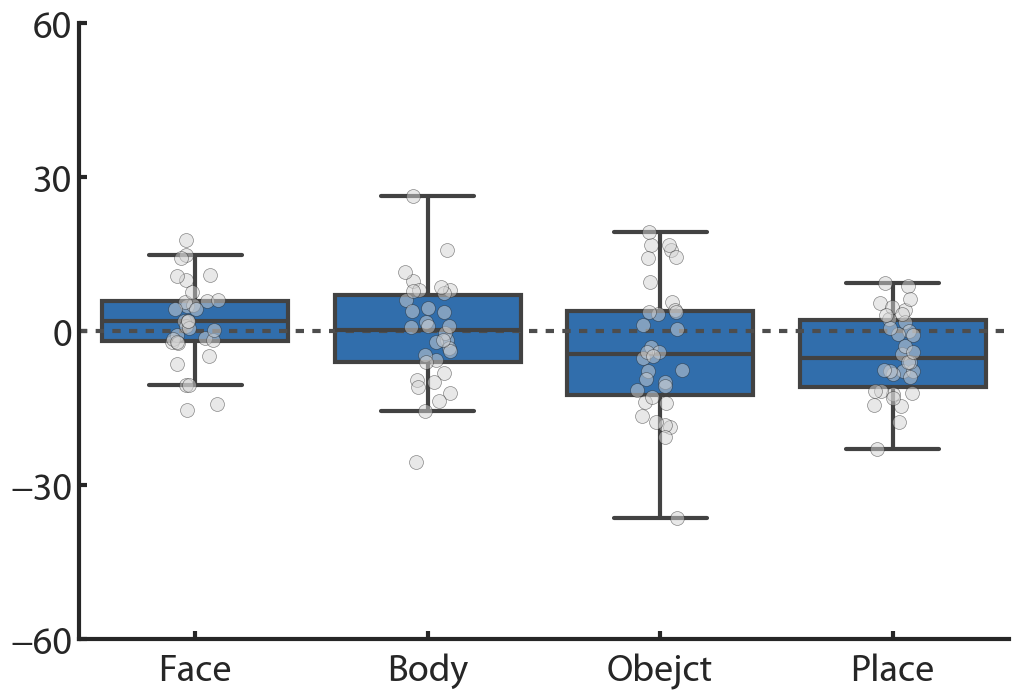

In [23]:
sns.set(font_scale=2.5,style="ticks",rc={'figure.figsize':(12,8)},font=prop.get_name())
ax = sns.boxplot(x="Category", y="Value", data=df_dim2_neg,palette=["#316eac"],fliersize=0,saturation=1,linewidth=3)
ax.axhline(0, color=".3", dashes=(2, 2),linewidth=3)
sns.stripplot(df_dim2_neg, x="Category", y="Value", size=10,color='lightgrey',edgecolor='k',linewidth=0.5,alpha=0.5)
ax.set(xlabel='', ylabel='')
ax.set(ylim=(-60,60), yticks=[-60,-30,0,30,60])
ax.tick_params(axis="y",direction="in", pad=5)
ax.tick_params(axis="x",direction="in", pad=10)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(width=3)
sns.despine()

In [28]:
anova_dim1pos = pg.rm_anova(dv='Value', within='Category', subject='Subject', data=df_dim1_pos, detailed=True)
anova_dim1neg = pg.rm_anova(dv='Value', within='Category', subject='Subject', data=df_dim1_neg, detailed=True)
anova_dim2pos = pg.rm_anova(dv='Value', within='Category', subject='Subject', data=df_dim2_pos, detailed=True)
anova_dim2neg = pg.rm_anova(dv='Value', within='Category', subject='Subject', data=df_dim2_neg, detailed=True)
#print(anova_dim1pos)

In [27]:
posthoc_dim1pos = pg.pairwise_tests(dv='Value', within='Category', subject='Subject', data=df_dim1_pos, padjust='bonferroni')
posthoc_dim1neg = pg.pairwise_tests(dv='Value', within='Category', subject='Subject', data=df_dim1_neg, padjust='bonferroni')
posthoc_dim2pos = pg.pairwise_tests(dv='Value', within='Category', subject='Subject', data=df_dim2_pos, padjust='bonferroni')
posthoc_dim2neg = pg.pairwise_tests(dv='Value', within='Category', subject='Subject', data=df_dim2_neg, padjust='bonferroni')

## Yeo's 7-network

In [14]:
cvdata = sio.loadmat('../Signature_Distplot_Data.mat')
Yeo7colors = cvdata['RSN7colors']
Yeo7names = [names[0] for names in cvdata['RSN7nets_names']]
nets_df = pd.DataFrame({'G1_sigature':cvdata['G1_weight_cort'][:,0],'G2_sigature':cvdata['G2_weight_cort'][:,0],'Yeo7cort':cvdata['RSN7cort'][:,0]})
nets_df["Yeo7cort"] = nets_df["Yeo7cort"].replace(0, np.nan)

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/441830094.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.boxplot(data=nets_df_g1_CA, x="G1_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False, width=0.7,whis=(0, 100),showmeans=True,meanprops={"marker":"D","markerfacecolor":"red", "markeredgecolor":"white"},linewidth=2)


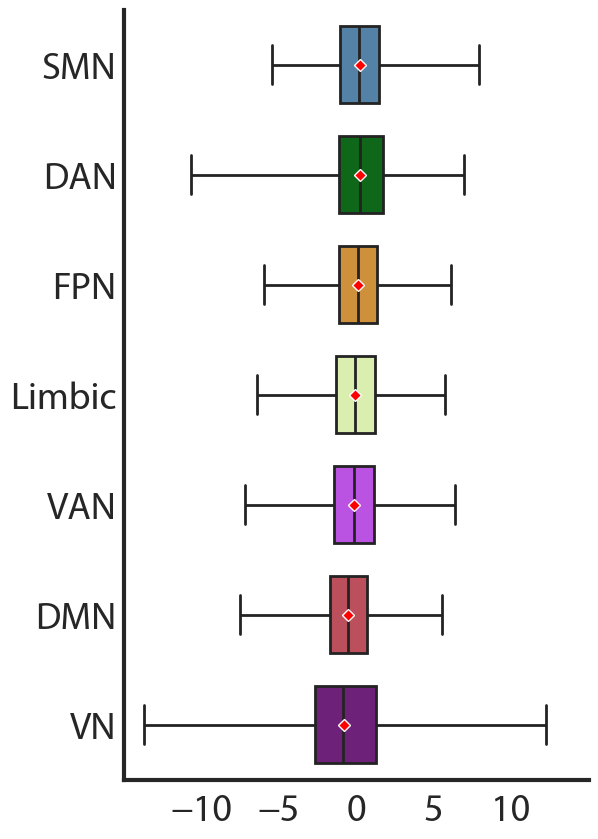

In [32]:
sns.set_context("talk")
sns.set(font_scale=2.5,style="white",rc={"axes.facecolor": (0, 0, 0, 0),'figure.figsize':(6,10)},font=prop.get_name())

nets_df_g1_CA = nets_df.copy()
uni_indices = nets_df_g1_CA["Yeo7cort"].unique()
uni_indices.sort()
name_mapping = dict(zip(np.array([1,2,3,4,5,6,7]), Yeo7names))
avg_values_num = nets_df_g1_CA.groupby("Yeo7cort")["G1_sigature"].mean().sort_values(ascending=False)
Yeo7colors_reorder = Yeo7colors[np.array(avg_values_num.index.astype(int))-1,:]
nets_df_g1_CA["Yeo7cort"] = nets_df_g1_CA["Yeo7cort"].replace(name_mapping)
avg_values = nets_df_g1_CA.groupby("Yeo7cort")["G1_sigature"].mean().sort_values(ascending=False)
nets_df_g1_CA["Yeo7cort"] = pd.Categorical(nets_df_g1_CA["Yeo7cort"], categories=avg_values.index, ordered=True)

g = sns.boxplot(data=nets_df_g1_CA, x="G1_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False, width=0.7,whis=(0, 100),showmeans=True,meanprops={"marker":"D","markerfacecolor":"red", "markeredgecolor":"white"},linewidth=2)
#g = sns.violinplot(data=nets_df_g1_CA, x="G1_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False)

g.set(xlabel='', ylabel='')
g.set(xlim=(-15,15), xticks=[-10,-5,0,5,10])
g.tick_params(axis="y",direction="in", pad=5)
g.tick_params(axis="x",direction="in", pad=10)
g.spines['bottom'].set_linewidth(3)
g.spines['left'].set_linewidth(3)
g.tick_params(width=3)
sns.despine()

/var/folders/2q/v8k7f8yj5jg6mtyx9v4xzr340000gn/T/ipykernel_94311/3070462391.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.boxplot(data=nets_df_g2_CA, x="G2_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False, width=0.7,whis=(0, 100),showmeans=True,meanprops={"marker":"D","markerfacecolor":"red", "markeredgecolor":"white"},linewidth=2)


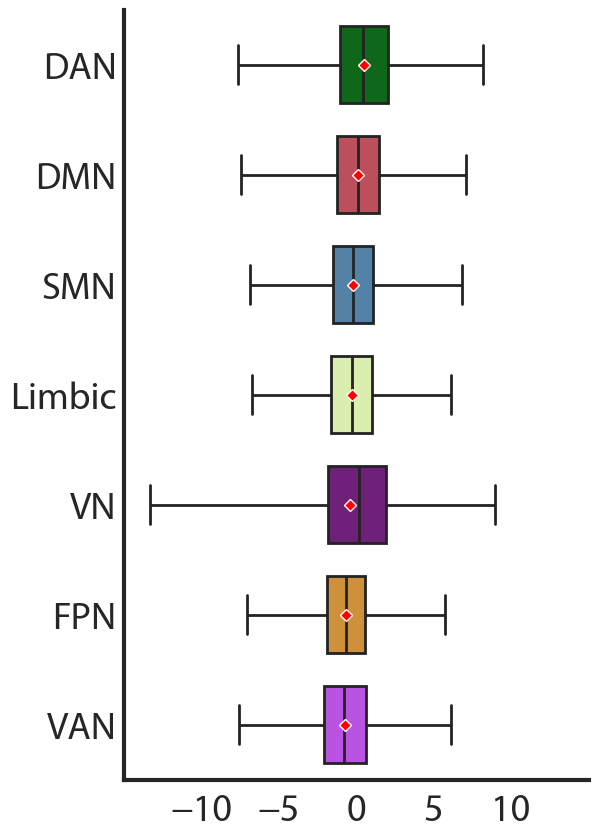

In [33]:
sns.set_context("talk")
sns.set(font_scale=2.5,style="white",rc={"axes.facecolor": (0, 0, 0, 0),'figure.figsize':(6,10)},font=prop.get_name())

nets_df_g2_CA = nets_df.copy()
uni_indices = nets_df_g2_CA["Yeo7cort"].unique()
uni_indices.sort()
name_mapping = dict(zip(np.array([1,2,3,4,5,6,7]), Yeo7names))
avg_values_num = nets_df_g2_CA.groupby("Yeo7cort")["G2_sigature"].mean().sort_values(ascending=False)
Yeo7colors_reorder = Yeo7colors[np.array(avg_values_num.index.astype(int))-1,:]
nets_df_g2_CA["Yeo7cort"] = nets_df_g2_CA["Yeo7cort"].replace(name_mapping)
avg_values = nets_df_g2_CA.groupby("Yeo7cort")["G2_sigature"].mean().sort_values(ascending=False)
nets_df_g2_CA["Yeo7cort"] = pd.Categorical(nets_df_g2_CA["Yeo7cort"], categories=avg_values.index, ordered=True)

g = sns.boxplot(data=nets_df_g2_CA, x="G2_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False, width=0.7,whis=(0, 100),showmeans=True,meanprops={"marker":"D","markerfacecolor":"red", "markeredgecolor":"white"},linewidth=2)
#g = sns.violinplot(data=nets_df_g2_CA, x="G2_sigature", y="Yeo7cort",hue="Yeo7cort", palette=Yeo7colors_reorder,legend=False)
g.set(xlabel='', ylabel='')
g.set(xlim=(-15,15), xticks=[-10,-5,0,5,10])
g.tick_params(axis="y",direction="in", pad=5)
g.tick_params(axis="x",direction="in", pad=10)
g.spines['bottom'].set_linewidth(3)
g.spines['left'].set_linewidth(3)
g.tick_params(width=3)
sns.despine()